### import libraries

In [1]:
import tensorflow as tf

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
import pandas as pd

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [3]:
split_ratio = 0.8
split_index = int(len(x_train) * split_ratio)

x_train_split = x_train[:split_index]
y_train_split = y_train[:split_index]

x_val = x_train[split_index:]
y_val = y_train[split_index:]

In [4]:
from keras.applications import VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

58892288/58889256 [==============================] - ETA:  - 18s 0us/step


In [5]:
for layer in base_model.layers:
    layer.trainable = False

In [6]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [7]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
batch_size = 128
epochs = 10
history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/10
313/313 [==============================] - 109s 348ms/step - loss: 1.5984 - accuracy: 0.4396 - val_loss: 1.3172 - val_accuracy: 0.5446
Epoch 2/10
313/313 [==============================] - 120s 384ms/step - loss: 1.3462 - accuracy: 0.5282 - val_loss: 1.2520 - val_accuracy: 0.5637
Epoch 3/10
313/313 [==============================] - 115s 368ms/step - loss: 1.2713 - accuracy: 0.5545 - val_loss: 1.2016 - val_accuracy: 0.5824
Epoch 4/10
313/313 [==============================] - 116s 372ms/step - loss: 1.2304 - accuracy: 0.5707 - val_loss: 1.1724 - val_accuracy: 0.5902
Epoch 5/10
313/313 [==============================] - 122s 391ms/step - loss: 1.2046 - accuracy: 0.5780 - val_loss: 1.1633 - val_accuracy: 0.5943
Epoch 6/10
313/313 [==============================] - 117s 373ms/step - loss: 1.1792 - accuracy: 0.5900 - val_loss: 1.1545 - val_accuracy: 0.5990
Epoch 7/10
313/313 [==============================] - 114s 366ms/step - loss: 1.1583 - accuracy: 0.5967 - val_loss: 1.1413 -

In [9]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")

313/313 [==============================] - 23s 75ms/step - loss: 1.1280 - accuracy: 0.6030
Test Loss: 1.1280
Test Accuracy: 60.30%


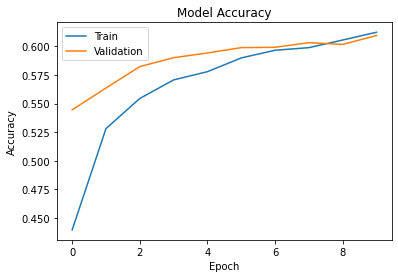

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [11]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(10, activation='softmax'))
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
313/313 [==============================] - 50s 160ms/step - loss: 1.7675 - accuracy: 0.3516 - val_loss: 1.4309 - val_accuracy: 0.4990
Epoch 2/10
313/313 [==============================] - 49s 157ms/step - loss: 1.4414 - accuracy: 0.4783 - val_loss: 1.2385 - val_accuracy: 0.5681
Epoch 3/10
313/313 [==============================] - 50s 159ms/step - loss: 1.3072 - accuracy: 0.5312 - val_loss: 1.1205 - val_accuracy: 0.6120
Epoch 4/10
313/313 [==============================] - 49s 158ms/step - loss: 1.2069 - accuracy: 0.5670 - val_loss: 1.1281 - val_accuracy: 0.6056
Epoch 5/10
313/313 [==============================] - 50s 158ms/step - loss: 1.1428 - accuracy: 0.5919 - val_loss: 1.0210 - val_accuracy: 0.6443
Epoch 6/10
313/313 [==============================] - 50s 159ms/step - loss: 1.0852 - accuracy: 0.6105 - val_loss: 0.9891 - val_accuracy: 0.6546
Epoch 7/10
313/313 [==============================] - 51s 162ms/step - loss: 1.0441 - accuracy: 0.6252 - val_loss: 0.9611 - val_ac

In [12]:
cnn_loss, cnn_accuracy = cnn_model.evaluate(x_test, y_test)
print(f"CNN Model - Test Loss: {cnn_loss:.4f}")
print(f"CNN Model - Test Accuracy: {cnn_accuracy*100:.2f}%")

313/313 [==============================] - 3s 9ms/step - loss: 0.9286 - accuracy: 0.6768
CNN Model - Test Loss: 0.9286
CNN Model - Test Accuracy: 67.68%


In [13]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
for layer in base_model.layers:
    layer.trainable = False

In [14]:
transfer_model = Sequential()
transfer_model.add(base_model)
transfer_model.add(Flatten())
transfer_model.add(Dense(256, activation='relu'))
transfer_model.add(Dropout(0.5))
transfer_model.add(Dense(10, activation='softmax'))
transfer_model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
transfer_model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
313/313 [==============================] - 112s 358ms/step - loss: 1.6095 - accuracy: 0.4345 - val_loss: 1.3298 - val_accuracy: 0.5371
Epoch 2/10
313/313 [==============================] - 114s 364ms/step - loss: 1.3485 - accuracy: 0.5307 - val_loss: 1.2463 - val_accuracy: 0.5601
Epoch 3/10
313/313 [==============================] - 115s 367ms/step - loss: 1.2769 - accuracy: 0.5549 - val_loss: 1.2034 - val_accuracy: 0.5753
Epoch 4/10
313/313 [==============================] - 114s 365ms/step - loss: 1.2368 - accuracy: 0.5692 - val_loss: 1.1802 - val_accuracy: 0.5852
Epoch 5/10
313/313 [==============================] - 114s 363ms/step - loss: 1.2065 - accuracy: 0.5757 - val_loss: 1.1614 - val_accuracy: 0.5933
Epoch 6/10
313/313 [==============================] - 114s 363ms/step - loss: 1.1854 - accuracy: 0.5874 - val_loss: 1.1474 - val_accuracy: 0.5988
Epoch 7/10
313/313 [==============================] - 117s 373ms/step - loss: 1.1605 - accuracy: 0.5972 - val_loss: 1.1476 -

In [15]:
transfer_loss, transfer_accuracy = transfer_model.evaluate(x_test, y_test)
print(f"Transfer Learning Model - Test Loss: {transfer_loss:.4f}")
print(f"Transfer Learning Model - Test Accuracy: {transfer_accuracy*100:.2f}%")

313/313 [==============================] - 24s 76ms/step - loss: 1.1329 - accuracy: 0.6006
Transfer Learning Model - Test Loss: 1.1329
Transfer Learning Model - Test Accuracy: 60.06%


In [16]:
transfer_predictions = transfer_model.predict(x_test)
transfer_labels = np.argmax(y_test, axis=1)
transfer_predictions = np.argmax(transfer_predictions, axis=1)

In [17]:
!pip install scikit-learn

In [18]:
import sklearn
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
transfer_report = classification_report(transfer_labels, transfer_predictions)
transfer_confusion = confusion_matrix(transfer_labels, transfer_predictions)

In [19]:
print("Transfer Learning Model Evaluation Metrics:")
print(transfer_report)
print("Transfer Learning Model Confusion Matrix:")
print(transfer_confusion)

Transfer Learning Model Evaluation Metrics:
              precision    recall  f1-score   support

           0       0.65      0.70      0.67      1000
           1       0.64      0.69      0.66      1000
           2       0.53      0.48      0.51      1000
           3       0.43      0.44      0.44      1000
           4       0.55      0.54      0.55      1000
           5       0.56      0.48      0.52      1000
           6       0.63      0.67      0.65      1000
           7       0.70      0.62      0.65      1000
           8       0.73      0.70      0.72      1000
           9       0.58      0.68      0.63      1000

    accuracy                           0.60     10000
   macro avg       0.60      0.60      0.60     10000
weighted avg       0.60      0.60      0.60     10000

Transfer Learning Model Confusion Matrix:
[[704  32  59  12  16  13   3  18  98  45]
 [ 38 686  15  33   5  15  19  15  40 134]
 [ 85  28 483  68 115  63  94  37  10  17]
 [ 30  47  70 443  56 139 

In [20]:
cnn_predictions = cnn_model.predict(x_test)
cnn_labels = np.argmax(y_test, axis=1)
cnn_predictions = np.argmax(cnn_predictions, axis=1)

In [21]:
cnn_report = classification_report(cnn_labels, cnn_predictions)
cnn_confusion = confusion_matrix(cnn_labels, cnn_predictions)

In [22]:
print("CNN Model Evaluation Metrics:")
print(cnn_report)
print("CNN Model Confusion Matrix:")
print(cnn_confusion)

CNN Model Evaluation Metrics:
              precision    recall  f1-score   support

           0       0.79      0.62      0.70      1000
           1       0.81      0.77      0.79      1000
           2       0.54      0.52      0.53      1000
           3       0.49      0.51      0.50      1000
           4       0.62      0.66      0.64      1000
           5       0.61      0.56      0.58      1000
           6       0.72      0.78      0.75      1000
           7       0.68      0.78      0.73      1000
           8       0.74      0.81      0.78      1000
           9       0.78      0.76      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000

CNN Model Confusion Matrix:
[[625  19 100  32  19   3  11  27 122  42]
 [ 17 768  10  16   5   3  12   7  50 112]
 [ 40   3 517  66 122  94  74  61  15   8]
 [ 12   9  72 513  76 149  89  55  16   9]
 [ 19   2  

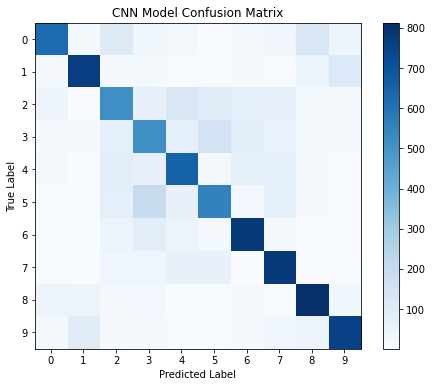

In [23]:
plt.figure(figsize=(8, 6))
plt.imshow(cnn_confusion, cmap=plt.cm.Blues)
plt.title('CNN Model Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.show()

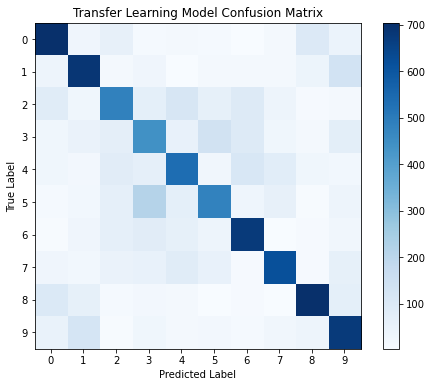

In [24]:
plt.figure(figsize=(8, 6))
plt.imshow(transfer_confusion, cmap=plt.cm.Blues)
plt.title('Transfer Learning Model Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.show()

In [25]:
metrics_table = pd.DataFrame({
    'Model': ['CNN Model', 'Transfer Learning Model'],
    'Test Loss': [cnn_loss, transfer_loss],
    'Test Accuracy': [cnn_accuracy, transfer_accuracy]
})
print("Evaluation Metrics:")
print(metrics_table)

Evaluation Metrics:
                     Model  Test Loss  Test Accuracy
0                CNN Model   0.928601         0.6768
1  Transfer Learning Model   1.132878         0.6006


In [26]:
cnn_train_loss, cnn_train_acc = cnn_model.evaluate(x_train, y_train)
print(f"CNN Model - Training Loss: {cnn_train_loss:.4f}")
print(f"CNN Model - Training Accuracy: {cnn_train_acc*100:.2f}%")

1563/1563 [==============================] - 14s 9ms/step - loss: 0.7136 - accuracy: 0.7585
CNN Model - Training Loss: 0.7136
CNN Model - Training Accuracy: 75.85%


In [27]:
transfer_train_loss, transfer_train_acc = transfer_model.evaluate(x_train, y_train)
print(f"Transfer Learning Model - Training Loss: {transfer_train_loss:.4f}")
print(f"Transfer Learning Model - Training Accuracy: {transfer_train_acc*100:.2f}%")

1563/1563 [==============================] - 122s 78ms/step - loss: 1.0229 - accuracy: 0.6445
Transfer Learning Model - Training Loss: 1.0229
Transfer Learning Model - Training Accuracy: 64.45%


In [28]:
performance_table = pd.DataFrame({
    'Model': ['CNN Model', 'Transfer Learning Model'],
    'Training Accuracy': [cnn_train_acc, transfer_train_acc],
    'Test Accuracy': [cnn_accuracy, transfer_accuracy]
})

print("Model Performance on Training and Testing Sets:")
print(performance_table)

Model Performance on Training and Testing Sets:
                     Model  Training Accuracy  Test Accuracy
0                CNN Model            0.75854         0.6768
1  Transfer Learning Model            0.64454         0.6006
